<a href="https://colab.research.google.com/github/TOUATIMOHAnitMED/ALPR-/blob/master/01_Explorer_Sinudoides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Explorer les sinusoïdes

## Simulation d'un signal sinusoïdal « analogique »

$x(t) = A.sin(2πft+ϕ)$

In [0]:
import numpy as np

A = 1 # Amplitude
f = 3 # Fréquence en Hz
sr = 44100 # Fréquence d'échantillonnage (_sampling rate_)
t = np.arange(0,1, 1/sr) # en sec. // Liste de valeurs avec un interv. de 1/sr
phi = 0

In [0]:
y = A*np.sin(2*np.pi*f*t + phi)
type(t), t.dtype

(numpy.ndarray, dtype('float64'))

In [0]:
y[0:9]

array([0.        , 0.00042743, 0.00085486, 0.00128228, 0.00170971,
       0.00213714, 0.00256456, 0.00299199, 0.00341941])

## Dessiner les valeurs avec `matplotlib`

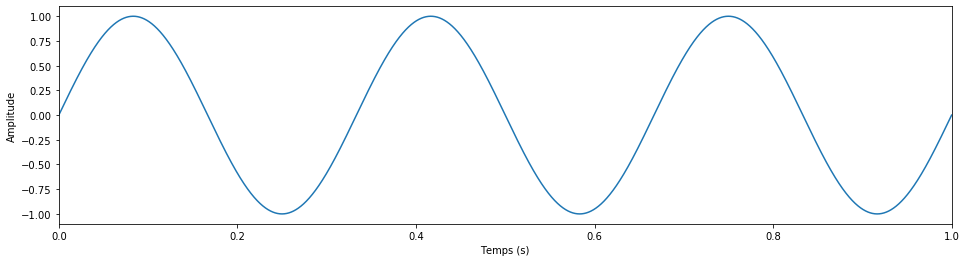

In [0]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16, 4))

plt.plot(t, y)
plt.axis([0,1,-1.1,1.1])
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

**À noter l'utilisation de [`arange`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) ou de [`linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)**

In [0]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [0]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [0]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

## Forme complexe

### $$e^{j(2πft+ϕ)}=cos(2πft+ϕ)+jsin(2πft+ϕ)$$

In [0]:
sr = 44100 # Fréquence d'échantillonage

f = 2
duree = 1 
t = np.linspace(0, duree, duree*sr)
phi = 0

In [0]:
s = np.exp(1j*(2*np.pi*f*t + phi)) # totalité du signal
yim = np.imag(s) # partie imaginaire
xim = np.real(s) # partie réelle

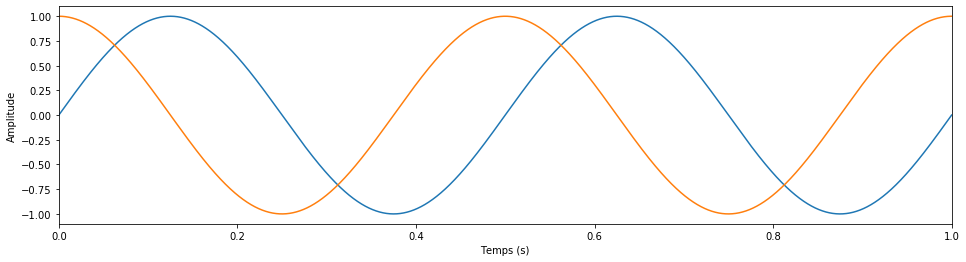

In [0]:
plt.plot(t,yim) # Sinus
plt.plot(t,xim) # Cosinus
plt.axis([0, duree, -1.1, 1.1])
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

### Sous forme de fonction interactive ([`ipywidgets`](https://ipywidgets.readthedocs.io/en/stable/))

In [0]:
from ipywidgets import interactive
from IPython.display import Audio, display

In [0]:
def simple_freq(f1=220.0):
    duree = 1
    sr = 8000
    t = np.linspace(0, duree, sr*duree)
    signal = np.sin(2*np.pi*f1*t)
    display(Audio(data=signal, rate=sr))
    return signal

In [0]:
interactive(simple_freq, f1=(200.0, 1000.0))

interactive(children=(FloatSlider(value=220.0, description='f1', max=1000.0, min=200.0), Output()), _dom_class…

In [0]:
# Plus de variables contrôlables
def signal(A=0.5, f=440, phi = 0, duree=1):
    sr = 8000
    t = np.linspace(0, duree , sr*duree) # en secondes
    x = A*np.sin(2*np.pi*f*t + phi)
    display(Audio(data=x, rate=8000))
    return x

In [0]:
interactive(signal, A=(0.0,1.0), f=(1.0,1000.0), phi=(0.0,np.pi*2), duree=(1,3))

interactive(children=(FloatSlider(value=0.5, description='A', max=1.0), FloatSlider(value=440.0, description='…

### Visualisation de battements ([source](https://ipywidgets.readthedocs.io/en/stable/examples/Beat%20Frequencies.html))

In [0]:
def beat_freq(f1=1.0, f2=1.1):
    tmax = 3
    sr = 8000
    times = np.arange(0, tmax, 1/sr) # np.linspace(0, tmax, sr*tmax)
    s1 = np.sin(2*np.pi*f1*times)
    s2 = np.sin(2*np.pi*f2*times)
    signal = s1 + s2
    plt.subplot(3, 1, 1)
    plt.plot(times, s1)
    plt.subplot(3, 1, 2)
    plt.plot(times, s2)
    plt.subplot(3, 1, 3)
    plt.plot(times, signal)
    display(Audio(data = signal, rate = sr))
    return signal

array([ 0.        ,  0.61878085,  1.17684058, ..., -1.61941668,
       -1.17684058, -0.61878085])

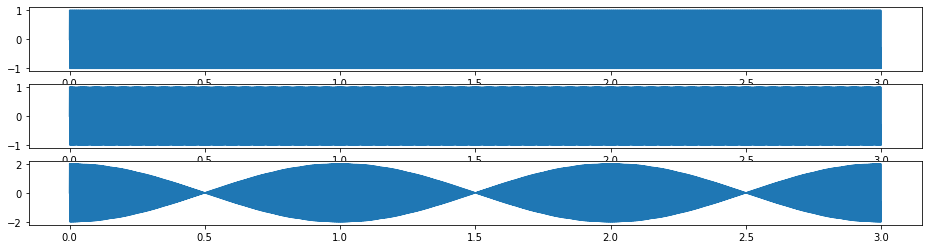

In [0]:
beat_freq(f1=400.0, f2=401.0)

## Enregistrement en tant que fichier audio

In [0]:
from scipy.io.wavfile import write

N = 44100 # samples
f = 440
fs = 44100
phi = 0
n = np.arange(N)
x = A*np.cos(2*np.pi*f*n/N + phi)

In [0]:
write('sine440_1sec.wav', 44100, x)